# **Indian Startup Funding Analysis - Exploratory Data analysis**

## Project Overview
**Goal**: Analyze India's startup funding ecosystem through comprehensive EDA to extract actionable business insights for investors, entrepreneurs, and policymakers.

**Dataset**: Indian Unicorn Startups 2023 (102 companies with $1B+ valuations)

## Loading and First Look

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


##Load The Data Set


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

# Basic dataset information

In [ ]:
df.shape

(102, 8)

In [ ]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [ ]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


## Data Quality Assessment

### Check data types and missing values

In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [ ]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


### Check for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

### Basic Statistics


In [ ]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**Key Insights to Discuss:**
- Dataset contains 102 Indian unicorn startups
- No missing values (clean dataset)
- Mix of categorical and numerical data


##Data Preprocessing

### Clean column names

In [ ]:
df.columns = df.columns.str.strip()

### Convert Entry column to datetime

In [ ]:
df['Entry_Date'] = pd.to_datetime(df['Entry'], format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


### Creat Valuation growth metric

In [ ]:
df['Valuation_Growth'] = df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


### Extract primary city (before '/')

In [ ]:
df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


### Count number of investors

In [ ]:
df['Investor_Count'] = df['Select Investors'].str.count(',') + 1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


# **Univariate Analysis**

### Valuation Distribution Analysis

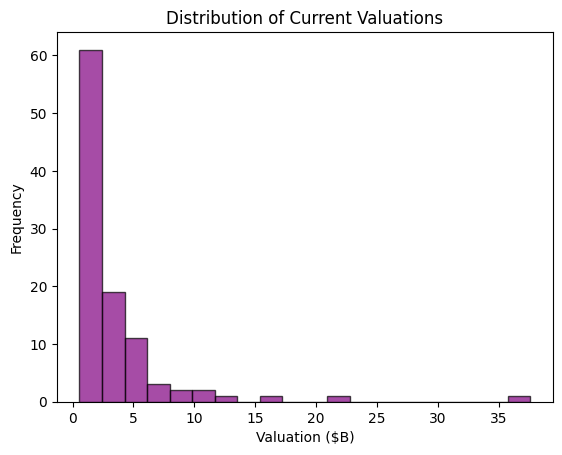

In [ ]:
plt.hist(df['Valuation ($B)'], bins=20,alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Current Valuations')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

**Key Insight**
- Highly right-skewed distribution (few mega-unicorns)
- Median valuation around 2-3B-Flikartdominateswith37.6B valuation
- Most unicorns clustered in $1-5B range

## Sector Analysis

### Sector distribution

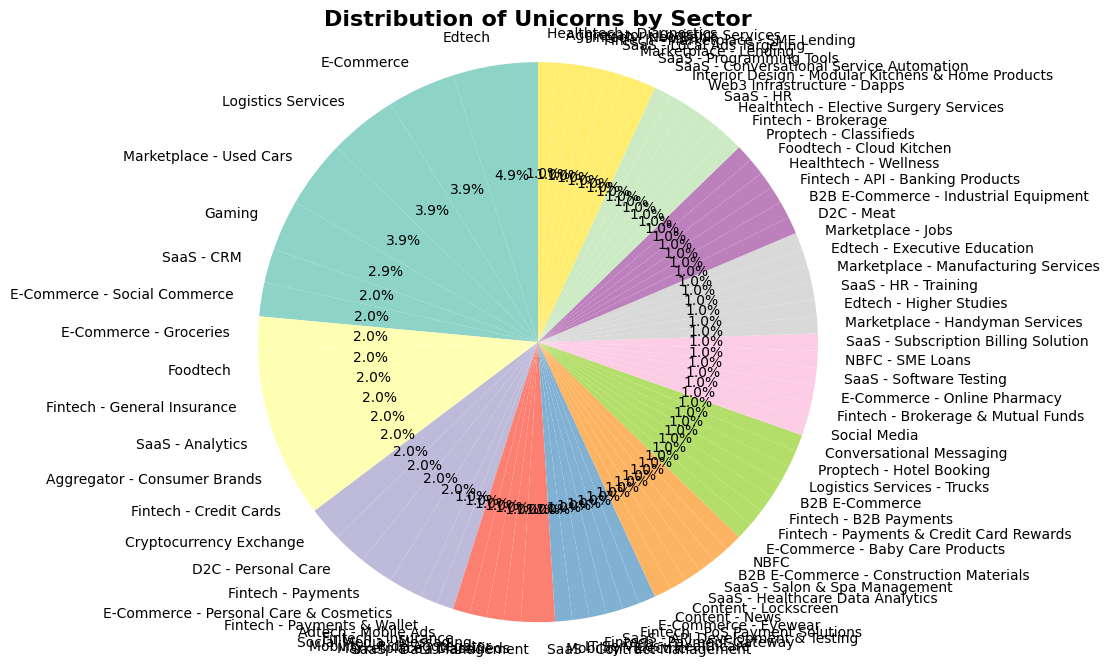

In [ ]:
plt.figure(figsize=(12,8))

sector_counts = df['Sector'].value_counts()
colors=plt.cm.Set3(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts.values, labels=sector_counts.index, autopct='%1.1f%%', colors=colors,startangle=90)
plt.title('Distribution of Unicorns by Sector', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

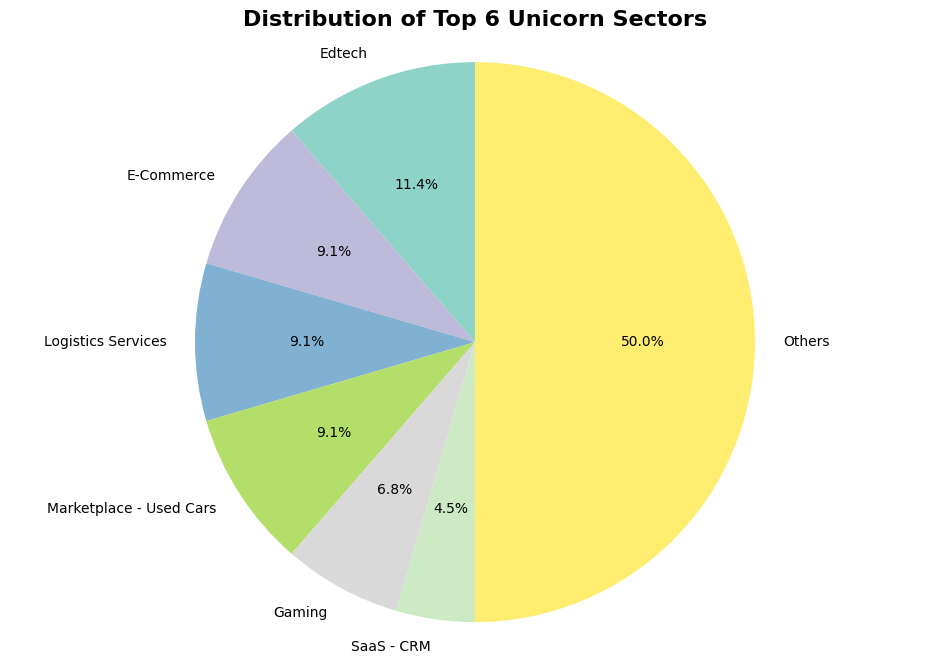

In [ ]:
def display_top_k_sector(df,k):
  sector_counts = df['Sector'].value_counts()

  #Select top k sectors and group the sest as 'Others'
  if k < len(sector_counts):
    top_sectors=sector_counts.head(k)
    other_sectors_count=sector_counts.iloc[:k].sum()
    top_sectors['Others']=other_sectors_count
  else:
    top_sectors=sector_counts

  plt.figure(figsize=(12,8))
  colors=plt.cm.Set3(np.linspace(0,1,len(top_sectors)))

  plt.pie(top_sectors.values, labels=top_sectors.index, autopct='%1.1f%%', colors=colors,startangle=90)
  plt.title(f"Distribution of Top {k} Unicorn Sectors",fontsize=16, fontweight='bold')
  plt.axis('equal')
  plt.show()

# Call the funtion with k=5 to display top 5 sectors
display_top_k_sector(df,6)

## Top Sectors Bar chart


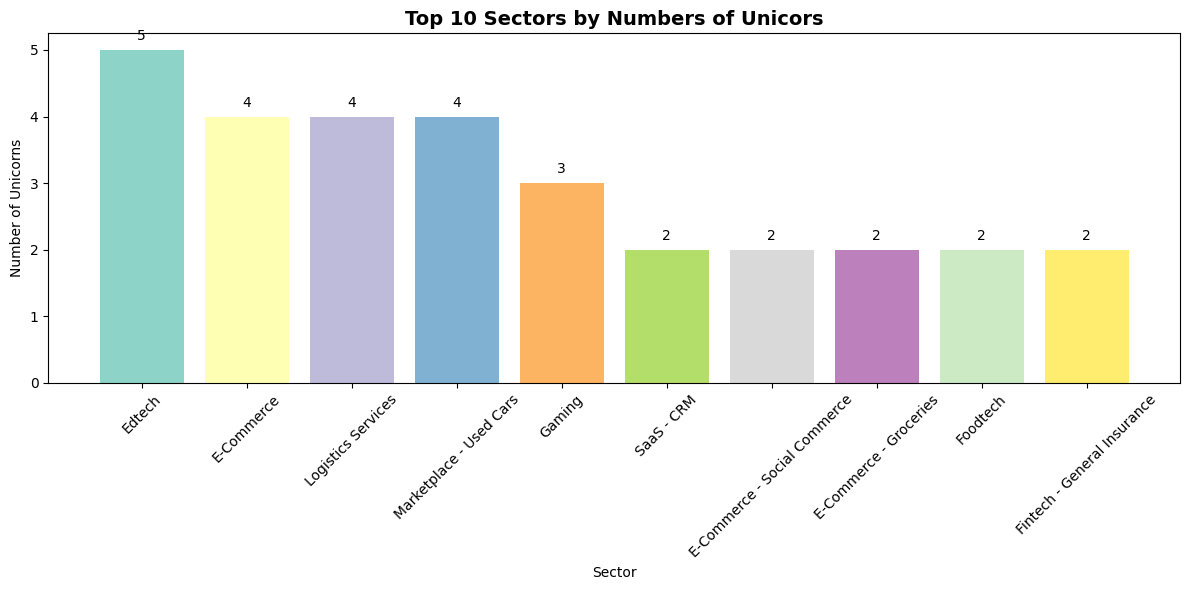

In [ ]:
plt.figure(figsize=(12,6))
top_sectors=sector_counts.head(10)
bars=plt.bar(range(len(top_sectors)),top_sectors.values,color=plt.cm.Set3(np.linspace(0,1,len(top_sectors))))
plt.title('Top 10 Sectors by Numbers of Unicors',fontsize=14,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45)

#add value labels on bars
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()

# Geographic Distribution

## City-wise Distribution

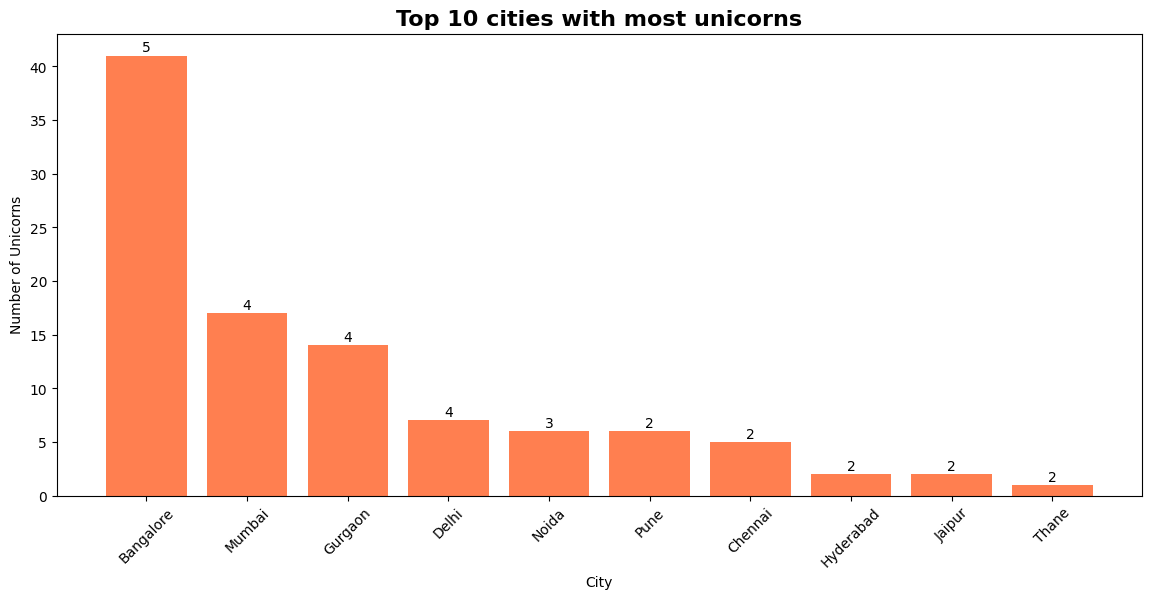

In [ ]:
plt.figure(figsize=(14,6))

city_counts=df['Primary_City'].value_counts().head(10)
bars=plt.bar(city_counts.index,city_counts.values,color='coral')
plt.title("Top 10 cities with most unicorns",fontsize=16,fontweight='bold')
plt.xlabel("City")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)

#Add value labels
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')

## Create a summary Tabel

In [ ]:

city_summary=df.groupby("Primary_City").agg({
    "Valuation ($B)": ["count","sum","mean"],"Entry_Year":["min","max"]
}).round(2)
city_summary.columns=["Count","Total_Valuation","Avg_Valuation","First Year","Last Year"]
city_summary.head(10)

,Count,Total_Valuation,Avg_Valuation,First Year,Last Year
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


**Key Insights:**
- Bangalore dominates with highest number of unicorns
- Mumbai and Gurgaon are other major hubs
- Geographic concentration in tech cities
- Bangalore leads in both count and total valuation

## **Temporal Analysis**

### Entry Year Trends

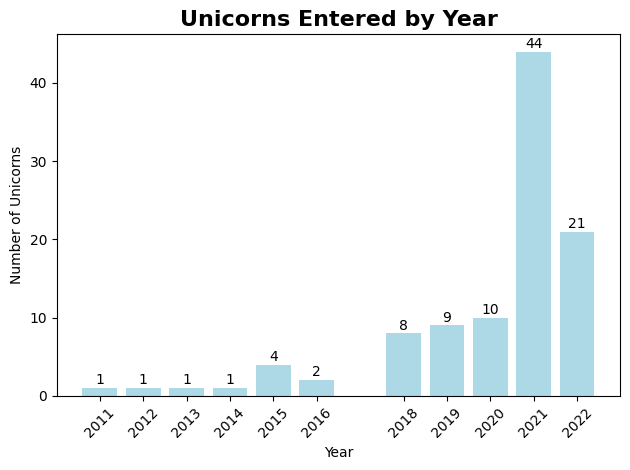

In [ ]:
yearly_entries=df['Entry_Year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='lightblue')
plt.title("Unicorns Entered by Year",fontsize=16,fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Unicorns")
plt.xticks(yearly_entries.index,rotation=45)
#Add value labels
for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()

## Cumulating Unicorns

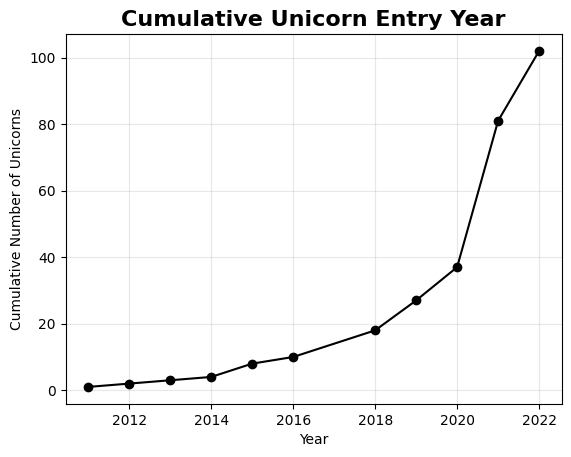

In [ ]:
cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linestyle='-',color='black')
plt.title('Cumulative Unicorn Entry Year',fontsize=16,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unicorns')
plt.grid(True,alpha=0.3)
plt.show()


## Average valuation by year

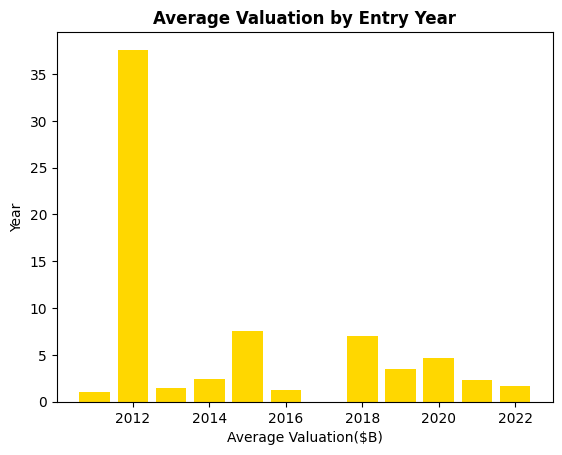

In [ ]:
avg_val_year = df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_year.index, avg_val_year.values,color='gold')
plt.title('Average Valuation by Entry Year',fontweight='bold')
plt.xlabel('Average Valuation($B)')
plt.ylabel('Year')
plt.show()

### sector Evaluation over time

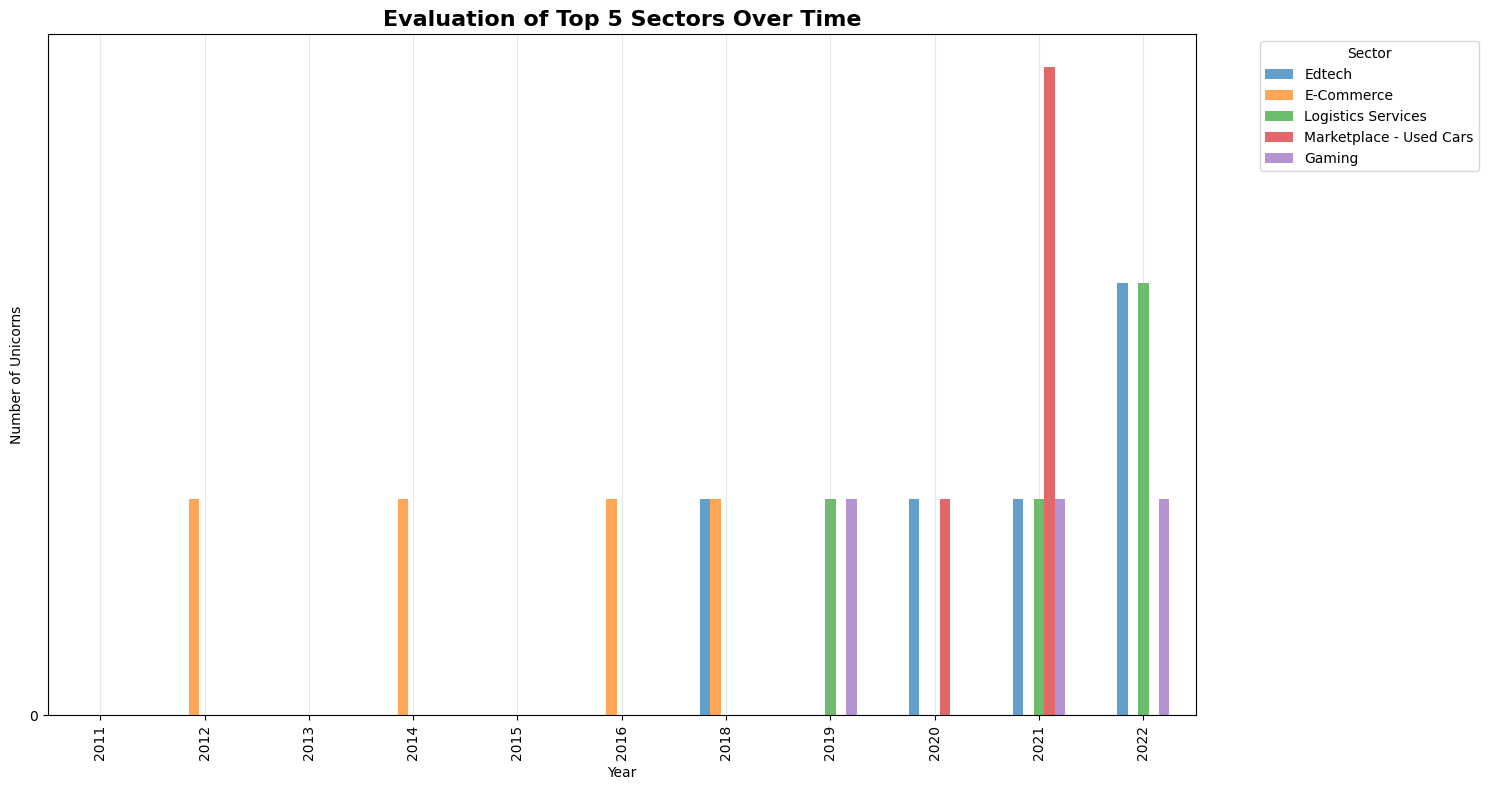

In [ ]:
def display_top_k_sector_evolution(df,k):
  #Group by year and sector,count occurences
  sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

  #select top k sectors based on overall count

  top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()
  sector_year=sector_year[top_k_sectors_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())
  plt.title(f'Evaluation of Top {k} Sectors Over Time',fontsize=16,fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector',loc='upper left',bbox_to_anchor=(1.05,1))
  plt.yticks(range(0,sector_year.values.max()+1,5))
  plt.grid(True,alpha=0.3)
  plt.tight_layout()
  plt.show()


display_top_k_sector_evolution(df,5)

# Bivariate Analysis

## Valuation vs Sector Analysis

### Average Valuation by sector


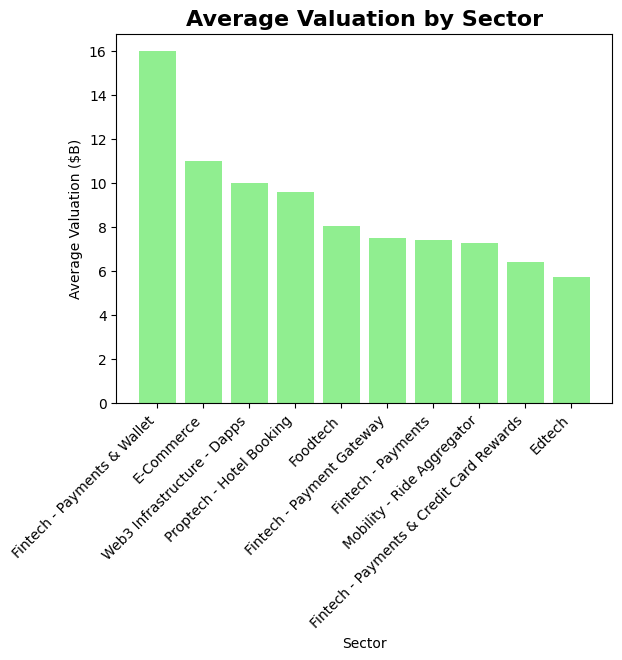

In [ ]:
avg_valuation=df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation=avg_valuation.sort_values(ascending=False).head(10)

bars=plt.bar(range(len(avg_valuation)),avg_valuation.values,color='lightgreen')
plt.title('Average Valuation by Sector',fontsize=16,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=45,ha='right')
plt.show()

### Sector vs Count vs Total Valuation

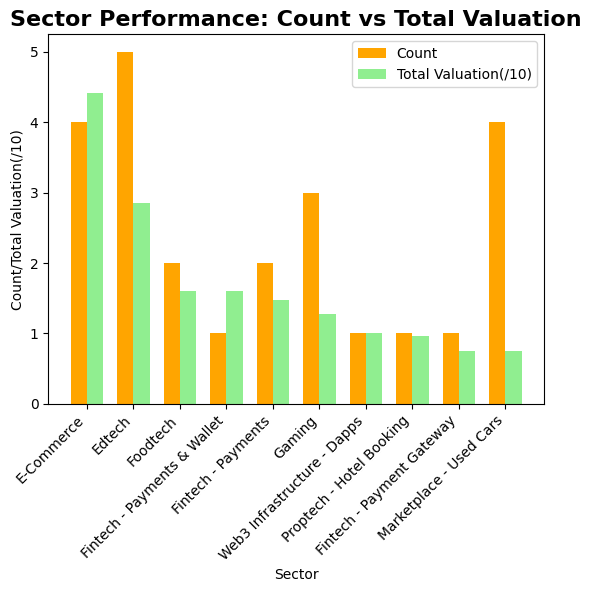

In [ ]:
sector_summary=df.groupby('Sector').agg({
    'Valuation ($B)':['count','sum']
}).round(2)
sector_summary.columns=['Count','Total_Valuation']
sector_summary=sector_summary.sort_values('Total_Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary.index))
width=0.35
plt.bar(x-width/2,sector_summary['Count'],width,label='Count',color='orange')
plt.bar(x+width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation(/10)',color='lightgreen')
plt.title("Sector Performance: Count vs Total Valuation",fontsize=16,fontweight='bold')
plt.xlabel("Sector")
plt.ylabel("Count/Total Valuation(/10)")
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.legend()
plt.show()

# Geographic vs Valuation Analysis

## Average Valuation by city

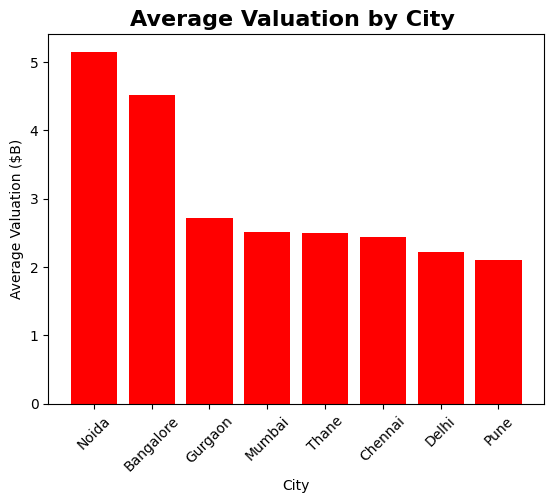

In [ ]:
city_valuation =df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation=city_valuation.sort_values(ascending=False).head(8)

bars=plt.bar(city_valuation.index,city_valuation.values,color='red')
plt.title("Average Valuation by City ",fontsize=16,fontweight='bold')
plt.xlabel("City")
plt.ylabel("Average Valuation ($B)")
plt.xticks(rotation=45)
plt.show()


##city vs count vs Total valution

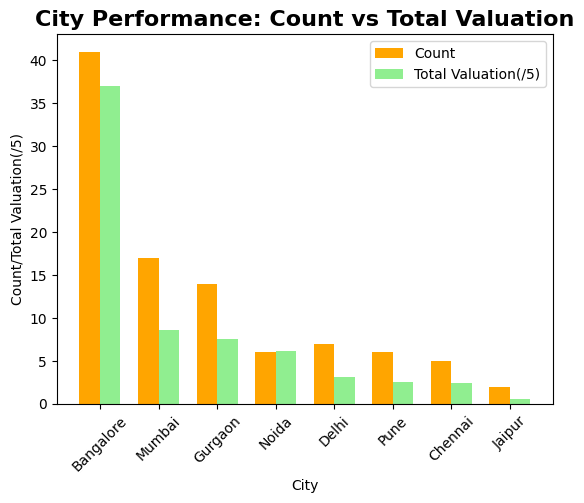

In [ ]:
city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)': ['count', 'sum']
}).round(2)
city_summary.columns = ['Count', 'Valuation ($B)']
city_summary = city_summary.sort_values('Valuation ($B)', ascending=False).head(8)

x = np.arange(len(city_summary))
width = 0.35

plt.bar(x - width/2, city_summary['Count'], width, label='Count', color='orange')
plt.bar(x + width/2, city_summary['Valuation ($B)'] / 5, width, label='Total Valuation(/5)', color='lightgreen')
plt.title("City Performance: Count vs Total Valuation", fontsize=16, fontweight='bold')
plt.xlabel("City")
plt.ylabel("Count/Total Valuation(/5)")
plt.xticks(x, city_summary.index, rotation=45)
plt.legend()
plt.show()



##Invester and Time Based Ananlysis

### Number of Invester vs Valuationp

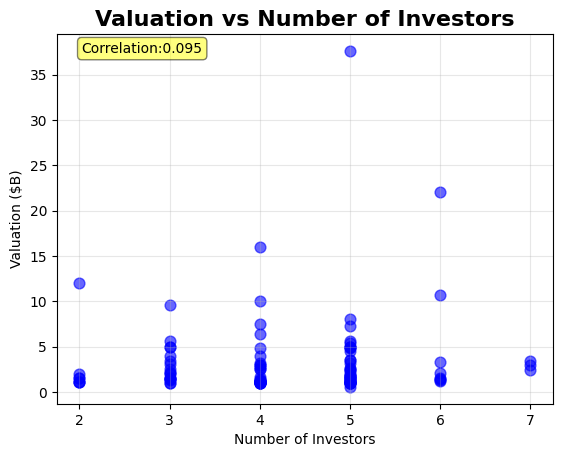

In [ ]:
plt.scatter(df['Investor_Count'],df['Valuation ($B)'],alpha=0.6,s=60,color='blue')
plt.title("Valuation vs Number of Investors",fontsize=16,fontweight='bold')
plt.xlabel("Number of Investors")
plt.ylabel("Valuation ($B)")
plt.grid(True,alpha=0.3)


correlation=df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.95,f'Correlation:{correlation:.3f}',transform=plt.gca().transAxes,bbox=dict(boxstyle='round,pad=0.3',facecolor='yellow',alpha=0.5))
plt.show()

### Most Active  Invester

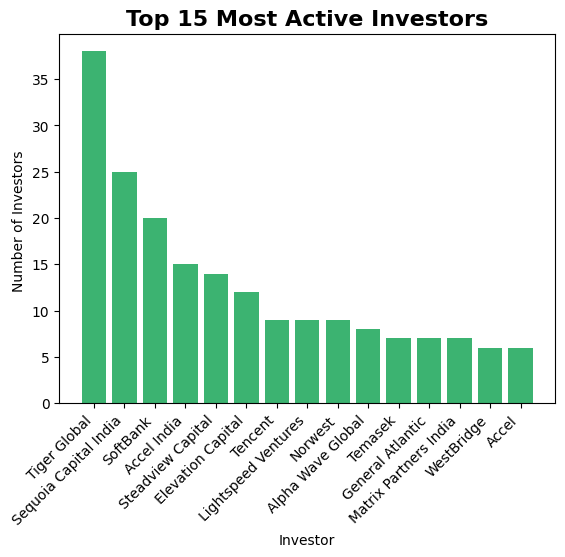

In [ ]:
all_investors=[]
for investors in df['Select Investors'].dropna():
  all_investors.extend([inv.strip() for inv in investors.split(',')])

investor_counts=pd.Series(all_investors).value_counts().head(15)
bars=plt.bar(range(len(investor_counts)),investor_counts.values,color='mediumseagreen')
plt.title("Top 15 Most Active Investors",fontsize=16,fontweight='bold')
plt.xlabel("Investor")
plt.ylabel("Number of Investors ")
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=45,ha='right')
plt.show()



## Entry year vs Investor Count

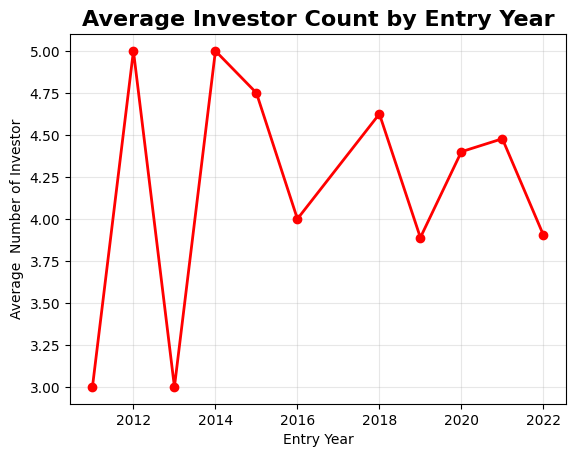

In [ ]:
year_investor=df.groupby('Entry_Year')['Investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',markersize=6,linewidth=2,color='red')
plt.title('Average Investor Count by Entry Year',fontsize=16,fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average  Number of Investor')
plt.grid(True,alpha=0.3)
plt.show()

## Investor count distrbuation

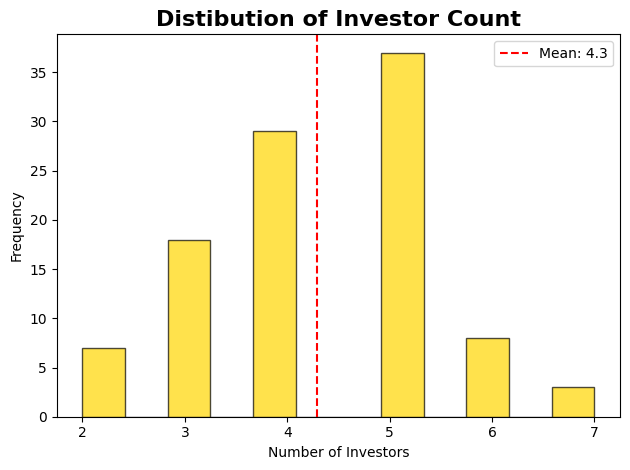

In [ ]:

plt.hist(df['Investor_Count'],bins=12,alpha=0.7,color='gold',edgecolor='black')
plt.title('Distibution of Investor Count',fontsize=16,fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='--',label=f'Mean: {df["Investor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()